## Real-world Data Wrangling

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

Throughout the process, you are expected to:

1. Explain your decisions towards methods used for gathering, assessing, cleaning, storing, and answering the research question
2. Write code comments so your code is more readable

Before you start, install the some of the required packages. 

In [1]:
!python -m pip install kaggle==1.6.12

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.7/79.7 kB 1.4 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.3/167.3 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 14.7 MB/s eta 0:00:00
  Created wheel for kaggle: filename=kaggle-1.6.12-py3-none-any.whl size=102969 sha256=0d02ba05b6e94af59eb9c5c51285ab5e5fef7e4146e630b02727a849f571c1fa
  Stored in directory: /home/student/.cache/pip/wheels/1e/0b/7c/50f8e89c3d2f82838dbd7afeddffbb9357003009ada98216c7
Successfully built kaggle
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
!pip install --target=/workspace ucimlrepo numpy==1.24.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 65.9 MB/s eta 0:00:0000:0100:01
  Using cached certifi-2024.8.30-py3-none-any.whl (167 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 73.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 508.0/508.0 kB 44.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 41.1 MB/s eta 0:00:00


**Note:** Restart the kernel to use updated package(s).

## 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

### **1.1.** Problem Statement
In 2-4 sentences, explain the kind of problem you want to look at and the datasets you will be wrangling for this project.

Finding the right datasets can be time-consuming. Here we provide you with a list of websites to start with. But we encourage you to explore more websites and find the data that interests you.

* Google Dataset Search https://datasetsearch.research.google.com/
* The U.S. Government’s open data https://data.gov/
* UCI Machine Learning Repository https://archive.ics.uci.edu/ml/index.php


### **1.2.** Gather at least two datasets using two different data gathering methods

***About the Datasets:***

This dataset was selected for its detailed records of box office performance, which enable in-depth analysis of movie revenue trends and industry patterns. It includes essential variables such as **daily earnings**, **active theaters**, **budget**, **distributor**, and **MPAA rating**, which are significant for studying factors influencing box office success. The inclusion of movie-specific details like **genres** and **runtime** offers additional insights into content-related attributes affecting performance. 

- **Attributes_DataFrame:** For each movie Title, include total domestic earnings, international earnings, budget, Distributor, MPAA-Rating, Runtime, Genre.

- **Daily_DataFrame:** For each title and date, includes daily earnings, number of theatres active, and daily rank among other movies being shown.



In [1]:
# Dawnload important pacekges 
import os
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Dataset 1: Attributes_DataFrame.csv

Type: CSV File.

Method: The data was gathered using the Programmatically downloading files.

**Dataset variables:**

*   Title: Title (Including Year)

*   Domestic: Total Domestic Earnings (US)

*   International: Total International Earnings

*   Budget: Budget if available, almost 30% are NaN

*   Distributor: Distributor

*   MPAA-Rating: MPAA Rating

*   Runtime: Movie Runetime

*   Genres: Listed Genres

In [2]:
# Declare the url for our dataset
dataset_path = "lukelarue/movie-attributes-for-3400-movies-from-20002020"
file_name = "Attributes_DataFrame.csv"
dataset_url = f"https://www.kaggle.com/api/v1/datasets/download/{dataset_path}/{file_name}"

# Declare the folder name for our datasets
datasets_folder_name = "datasets"

In [3]:
# Make HTTP get request to get our file using the URL var we declared in a previous cell
get_file_response = requests.get(dataset_url)

# Rise an exeption
get_file_response.raise_for_status()

# Loacl file path will be our dataset folder concated with th file name
local_file_path = os.path.join(datasets_folder_name, dataset_url.split('/')[-1])

# Ensure the datasets directory exists
os.makedirs(datasets_folder_name, exist_ok=True)

# Writing the file locally
with open(local_file_path, mode='wb') as file:
    file.write(get_file_response.content)

In [4]:
attributes_df = pd.read_csv(local_file_path)
attributes_df.head()

,Title,Domestic,International,Budget,Distributor,MPAA-Rating,Runtime,Genres
0,Jurassic World (2015),652270625,1018130012,150000000.0,Universal Pictures,PG-13,124,Action;Adventure;Sci-Fi
1,Star Wars: Episode VII - The Force Awakens (2015),936662225,1131561399,245000000.0,Walt Disney Studios Motion Pictures,PG-13,138,Action;Adventure;Sci-Fi
2,Avengers: Age of Ultron (2015),459005868,943800000,250000000.0,Walt Disney Studios Motion Pictures,PG-13,141,Action;Adventure;Sci-Fi
3,Inside Out (2015),356461711,501149463,175000000.0,Walt Disney Studios Motion Pictures,PG,95,Adventure;Animation;Comedy;Drama;Family;Fantasy
4,Furious 7 (2015),353007020,1162040651,190000000.0,Universal Pictures,PG-13,137,Action;Adventure;Thriller


#### **Dataset 2: Daily_DataFrame.csv**

Type: CSV File.

Method: The data was gathered using the Download data manually.

**Dataset variables:**

*   Movie_Title: Title (Including Release Year).

*   Date: Date of the Data Point.

*   Daily: Daily Earnings -- Some movies in 2020 have very few data points because of a COVID down-year and should be removed.

*   Theaters: Number of current theatres showing the film -- Few theatres at the beginning indicates a limited release.

*   Rank: Daily earnings rank compared to other films being showed.

In [4]:
# We downloading dataset manually and reading it.
daily_df = pd.read_csv("datasets/Daily_DataFrame.csv")
daily_df.head()

,Movie_Title,Date,Daily,Theaters,Rank
0,Jurassic World (2015),2015-06-12,81953950,4274.0,1
1,Jurassic World (2015),2015-06-13,69644830,4274.0,1
2,Jurassic World (2015),2015-06-14,57207490,4274.0,1
3,Jurassic World (2015),2015-06-15,25344820,4274.0,1
4,Jurassic World (2015),2015-06-16,24342515,4274.0,1


### Make copies of the datasets to ensure the raw dataframes are not impacted
Optional data storing step: You may save your raw dataset files to the local data store before moving to the next step.

In [6]:
# Attributes_DataFrame raw dataset
raw_data_folder_name = "raw_data"

os.makedirs(raw_data_folder_name, exist_ok=True)

raw_attributes_path = os.path.join(raw_data_folder_name, file_name)

with open(raw_attributes_path, mode='wb') as file:
    file.write(get_file_response.content)

In [7]:
# Daily_DataFrame raw dataset
raw_daily_df = pd.read_csv("raw_data/Daily_DataFrame.csv")
raw_daily_df.head()

,Movie_Title,Date,Daily,Theaters,Rank
0,Jurassic World (2015),2015-06-12,81953950,4274.0,1
1,Jurassic World (2015),2015-06-13,69644830,4274.0,1
2,Jurassic World (2015),2015-06-14,57207490,4274.0,1
3,Jurassic World (2015),2015-06-15,25344820,4274.0,1
4,Jurassic World (2015),2015-06-16,24342515,4274.0,1


## 2. Assess data

### Quality Issue 1:
### Missing Values or Data


#### Missing Values or Data in Attributes_Dataframe:

Inspecting the Attributes_Dataframe visually and programmatically:

In [8]:
# Inspecting the dataframe visually
attributes_df.tail()

,Title,Domestic,International,Budget,Distributor,MPAA-Rating,Runtime,Genres
3395,The Wolf of Snow Hollow (2020),185026,81937,NaN,United Artists Releasing,R,83,Comedy;Horror;Thriller
3396,Come Away (2020),184477,1480982,NaN,Relativity Media,PG,94,Adventure;Drama;Fantasy
3397,No Escape (2020),167962,4135870,NaN,Vertical Entertainment,R,91,Adventure;Horror;Mystery;Thriller
3398,A Call to Spy (2020),159014,681026,NaN,IFC Films,PG-13,123,Biography;Crime;Drama;Thriller;War
3399,Love Story (2020),153504,153504,NaN,Fathom Events,PG,100,Drama;Romance


In [7]:
attributes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          3400 non-null   object 
 1   Domestic       3400 non-null   int64  
 2   International  3400 non-null   int64  
 3   Budget         2307 non-null   float64
 4   Distributor    3399 non-null   object 
 5   MPAA-Rating    3244 non-null   object 
 6   Runtime        3400 non-null   int64  
 7   Genres         3397 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 212.6+ KB


There are nulls vaules of the `Budget` & `Distributor` & `MPAA-Rating` columns in Attributes_Dataframe.

In [8]:
# Inspecting the dataframe programmatically
attributes_df.isnull().sum()

Title               0
Domestic            0
International       0
Budget           1093
Distributor         1
MPAA-Rating       156
Runtime             0
Genres              3
dtype: int64

**Issue and justification:**
- There is a missing value of **Attributes Dataset** which violates the Completeness.
- The `Budget` column has 1,093 missing values, likely due to the unavailability of budget data for certain movies, especially older or independent films, or inconsistent reporting practices. Additionally, data might have been absent or incomplete data due to the COVID-19 pandemic, and some studios may deliberately avoid disclosing budgets for strategic reasons. 

#### Missing Values or Data in Daily_DataFrame:

Inspecting the Daily_DataFrame visually and programmatically:

In [11]:
# Inspecting the dataframe visually
missing_theaters_rows = daily_df[daily_df['Theaters'] != daily_df['Theaters']]
missing_theaters_rows.head()

,Movie_Title,Date,Daily,Theaters,Rank
16163,The Amazing Spider-Man (2012),2012-07-02,850000,NaN,6
17118,Man of Steel (2013),2013-06-13,12062124,NaN,1
25748,Stuart Little (1999),2000-01-26,272059,NaN,6
25751,Stuart Little (1999),2000-02-01,221984,NaN,3
25752,Stuart Little (1999),2000-02-02,204462,NaN,3


In [12]:
daily_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254062 entries, 0 to 254061
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Movie_Title  254062 non-null  object 
 1   Date         254062 non-null  object 
 2   Daily        254062 non-null  int64  
 3   Theaters     254018 non-null  float64
 4   Rank         254062 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 9.7+ MB


There are nulls vaules of the **Theaters column** in Daily_Dataframe.

In [13]:
# Inspecting the dataframe programmatically
daily_df['Theaters'].isnull().sum()

44

**Issue and justification:** 
- By looking at the dataset using tools like df.head(), some rows might have missing values in critical columns like Theaters. For instance, certain movies released during 2020 may have sparse or incomplete data due to the COVID-19 pandemic.

### Quality Issue 2: 
### Data Validity > Data values fall within unacceptable ranges

In [14]:
# Inspecting the dataframe visually
# Display rows with unusually high daily earnings
daily_df.head(10)

,Movie_Title,Date,Daily,Theaters,Rank
0,Jurassic World (2015),2015-06-12,81953950,4274.0,1
1,Jurassic World (2015),2015-06-13,69644830,4274.0,1
2,Jurassic World (2015),2015-06-14,57207490,4274.0,1
3,Jurassic World (2015),2015-06-15,25344820,4274.0,1
4,Jurassic World (2015),2015-06-16,24342515,4274.0,1
5,Jurassic World (2015),2015-06-17,19895470,4274.0,1
6,Jurassic World (2015),2015-06-18,17822580,4274.0,1
7,Jurassic World (2015),2015-06-19,29114435,4291.0,2
8,Jurassic World (2015),2015-06-20,39112435,4291.0,1
9,Jurassic World (2015),2015-06-21,38361540,4291.0,1


In [13]:
daily_df.tail(10)

,Movie_Title,Date,Daily,Theaters,Rank
254052,A Call to Spy (2020),2020-11-12,430,27.0,21
254053,A Call to Spy (2020),2020-11-13,2058,8.0,22
254054,A Call to Spy (2020),2020-11-14,2059,8.0,22
254055,A Call to Spy (2020),2020-11-15,549,8.0,24
254056,A Call to Spy (2020),2020-11-16,380,8.0,17
254057,A Call to Spy (2020),2020-11-17,623,8.0,17
254058,A Call to Spy (2020),2020-11-18,568,8.0,17
254059,A Call to Spy (2020),2020-11-19,597,8.0,17
254060,Love Story (2020),2020-02-09,87198,650.0,20
254061,Love Story (2020),2020-02-12,66306,650.0,18


* We can visually identify that some values in the Daily column are very large and could be outliers. For example, the values in the first few rows are significantly higher than the others, and we might suspect that the highest values in the dataset could exceed the 99.9th percentile.


In [15]:
# Inspecting the dataframe programmatically
# Calculate the 99.9th percentile of the 'Daily' column
percentile_999 = daily_df['Daily'].quantile(0.999)

# Filter the rows where 'Daily' is greater than the 99.9th percentile
high_outliers = daily_df[daily_df['Daily'] > percentile_999]

# Display the rows with 'Daily' values greater than the 99.9th percentile
print("Outliers (values greater than the 99.9th percentile):")
high_outliers 

Outliers (values greater than the 99.9th percentile):


,Movie_Title,Date,Daily,Theaters,Rank
0,Jurassic World (2015),2015-06-12,81953950,4274.0,1
1,Jurassic World (2015),2015-06-13,69644830,4274.0,1
2,Jurassic World (2015),2015-06-14,57207490,4274.0,1
8,Jurassic World (2015),2015-06-20,39112435,4291.0,1
9,Jurassic World (2015),2015-06-21,38361540,4291.0,1
...,...,...,...,...,...
199548,Doctor Strange (2016),2016-11-04,32585335,3882.0,1
212005,Justice League (2017),2017-11-17,38471202,4051.0,1
212006,Justice League (2017),2017-11-18,32680117,4051.0,1
224105,Venom (2018),2018-10-05,32503530,4250.0,1


In [16]:
# Calculate the 0.1st percentile
percentile_001 = daily_df['Daily'].quantile(0.001)

# Filter rows below the 0.1st percentile
low_outliers = daily_df[daily_df['Daily'] < percentile_001]

# Display the low earners
print(f"Outliers (Rows below the 0.1st percentile (Threshold: {percentile_001})):")
low_outliers 

Outliers (Rows below the 0.1st percentile (Threshold: 42.0)):


,Movie_Title,Date,Daily,Theaters,Rank
1633,Gladiator (2000),2001-05-07,38,2.0,18
1634,Gladiator (2000),2001-05-08,26,2.0,18
3814,Harry Potter and the Chamber of Secrets (2002),2003-05-04,18,1.0,87
66210,Cinderella Man (2005),2005-11-03,25,1.0,44
66214,Cinderella Man (2005),2005-11-07,31,2.0,43
...,...,...,...,...,...
253391,Tulsa (2020),2020-10-29,22,10.0,32
253395,Tulsa (2020),2020-11-02,28,9.0,27
253398,Tulsa (2020),2020-11-05,20,9.0,30
253405,Tulsa (2020),2020-11-12,38,9.0,30


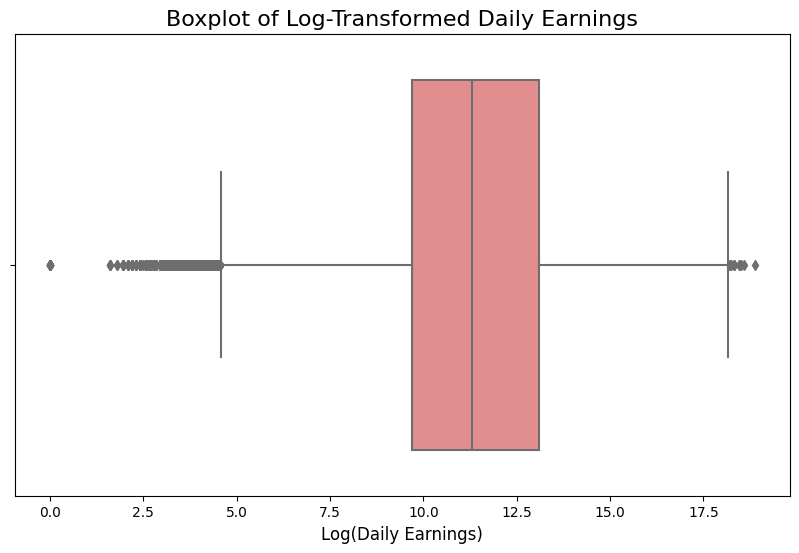

In [17]:
# Avoid log(0) errors
daily_df['Log_Daily'] = np.log1p(daily_df['Daily'])

# Plot the boxplot for log transformed values
plt.figure(figsize=(10, 6))
sns.boxplot(x=daily_df['Log_Daily'], orient='h', color='lightcoral')
plt.title('Boxplot of Log-Transformed Daily Earnings', fontsize=16)
plt.xlabel('Log(Daily Earnings)', fontsize=12)
plt.show()

**Issue and justification:**
Unusually high or low values ​​in a daily column, such as outliers above the 99.9th percentile or below the 0.1st percentile, may skew statistical analyses and summaries. These anomalies may result from data entry errors, special events (e.g., re-releases), or incorrectly reported values ​​during scraping.

### Tidiness Issue 1: 
### Multiple Variables Stored in a Single Column

In [67]:
# Inspecting the dataframe visually
attributes_df.head()

,Movie_Title,Domestic,International,Budget,Distributor,MPAA-Rating,Runtime,Genres,Release_Year
0,Jurassic World,652270625,1018130012,150000000.0,Universal Pictures,PG-13,124,Action,2015
1,Jurassic World,652270625,1018130012,150000000.0,Universal Pictures,PG-13,124,Adventure,2015
2,Jurassic World,652270625,1018130012,150000000.0,Universal Pictures,PG-13,124,Sci-Fi,2015
3,Star Wars: Episode VII - The Force Awakens,936662225,1131561399,245000000.0,Walt Disney Studios Motion Pictures,PG-13,138,Action,2015
4,Star Wars: Episode VII - The Force Awakens,936662225,1131561399,245000000.0,Walt Disney Studios Motion Pictures,PG-13,138,Adventure,2015



- The `Genres` column stores multiple genres in a single cell, separated by delimiters like `;`.

In [11]:
# Inspecting the dataframe programmatically
attributes_df['Genres'].head(20)

0                             Action;Adventure;Sci-Fi
1                             Action;Adventure;Sci-Fi
2                             Action;Adventure;Sci-Fi
3     Adventure;Animation;Comedy;Drama;Family;Fantasy
4                           Action;Adventure;Thriller
5                          Action;Biography;Drama;War
6            Adventure;Animation;Comedy;Family;Sci-Fi
7                    Action;Adventure;Sci-Fi;Thriller
8                              Adventure;Drama;Sci-Fi
9                        Drama;Family;Fantasy;Romance
10                              Comedy;Family;Fantasy
11                          Action;Adventure;Thriller
12                             Action;Adventure;Drama
13                    Action;Adventure;Drama;Thriller
14                                     Comedy;Romance
15                            Action;Adventure;Sci-Fi
16                                             Comedy
17                      Drama;Horror;Mystery;Thriller
18                          

In [12]:
attributes_df['Genres'].unique()

array(['Action;Adventure;Sci-Fi',
       'Adventure;Animation;Comedy;Drama;Family;Fantasy',
       'Action;Adventure;Thriller', 'Action;Biography;Drama;War',
       'Adventure;Animation;Comedy;Family;Sci-Fi',
       'Action;Adventure;Sci-Fi;Thriller', 'Adventure;Drama;Sci-Fi',
       'Drama;Family;Fantasy;Romance', 'Comedy;Family;Fantasy',
       'Action;Adventure;Drama', 'Action;Adventure;Drama;Thriller',
       'Comedy;Romance', 'Comedy', 'Drama;Horror;Mystery;Thriller',
       'Biography;Drama', 'Adventure;Family;Fantasy',
       'Adventure;Animation;Comedy;Family;Fantasy',
       'Action;Comedy;Crime;Thriller',
       'Action;Adventure;Fantasy;Thriller',
       'Action;Drama;History;Romance;War', 'Crime;Drama;Thriller',
       'Action;Adventure;Drama;Fantasy',
       'Action;Adventure;Fantasy;Sci-Fi',
       'Adventure;Family;Fantasy;Mystery',
       'Drama;Mystery;Sci-Fi;Thriller', 'Comedy;Drama;Romance',
       'Action;Adventure;Comedy;Crime',
       'Action;Adventure;Comedy;Myst

**Issue and justification:**
- In the `Genres` column stores multiple genres in a single cell, separated by delimiters like `;`. This violates the rule that each variable should form its own column.
- Multiple Variables Stored in a Single Column Issue ensures that each genre forms a distinct variable, improving the dataset's usability for analysis.

### Tidiness Issue 2: 
### Data Tidiness > Each variable forms a column

In [13]:
# Inspecting the Dataframe Visually
# We see each of datasets
daily_df['Movie_Title']

0         Jurassic World (2015)
1         Jurassic World (2015)
2         Jurassic World (2015)
3         Jurassic World (2015)
4         Jurassic World (2015)
                  ...          
254057     A Call to Spy (2020)
254058     A Call to Spy (2020)
254059     A Call to Spy (2020)
254060        Love Story (2020)
254061        Love Story (2020)
Name: Movie_Title, Length: 254062, dtype: object

In [14]:
attributes_df['Title']

0                                   Jurassic World (2015)
1       Star Wars: Episode VII - The Force Awakens (2015)
2                          Avengers: Age of Ultron (2015)
3                                       Inside Out (2015)
4                                        Furious 7 (2015)
                              ...                        
3395                       The Wolf of Snow Hollow (2020)
3396                                     Come Away (2020)
3397                                     No Escape (2020)
3398                                 A Call to Spy (2020)
3399                                    Love Story (2020)
Name: Title, Length: 3400, dtype: object

In [21]:
# Inspecting the dataframe programmatically
# Check for distinct variables in the Movie_Title column
daily_df['Title_Contains_Variables'] = daily_df['Movie_Title'].str.contains(r'\(.*\)')  # Check if there are year parentheses
print("\nCheck if Movie_Title contains both Name and Year (as separate variables):")
daily_df[['Movie_Title', 'Title_Contains_Variables']]


Check if Movie_Title contains both Name and Year (as separate variables):


,Movie_Title,Title_Contains_Variables
0,Jurassic World (2015),True
1,Jurassic World (2015),True
2,Jurassic World (2015),True
3,Jurassic World (2015),True
4,Jurassic World (2015),True
...,...,...
254057,A Call to Spy (2020),True
254058,A Call to Spy (2020),True
254059,A Call to Spy (2020),True
254060,Love Story (2020),True


In [22]:
daily_df['Title_Contains_Variables'].unique()

array([ True])

In [18]:
attributes_df['Title_Contains_Variables'] = attributes_df['Title'].str.contains(r'\(.*\)')  # Check if there are year parentheses
print("\nCheck if Title contains both Name and Year (as separate variables):")
attributes_df[['Title', 'Title_Contains_Variables']]


Check if Title contains both Name and Year (as separate variables):


,Title,Title_Contains_Variables
0,Jurassic World (2015),True
1,Star Wars: Episode VII - The Force Awakens (2015),True
2,Avengers: Age of Ultron (2015),True
3,Inside Out (2015),True
4,Furious 7 (2015),True
...,...,...
3395,The Wolf of Snow Hollow (2020),True
3396,Come Away (2020),True
3397,No Escape (2020),True
3398,A Call to Spy (2020),True


In [23]:
attributes_df['Title_Contains_Variables'].unique()

array([ True])

**Issue and justification:**
- The `name` of the movie and the `year` are separate variables.
- Combining them in one column (`Movie_Title` in daily_df & `Title` in attributes_df) means these two variables are not in their own columns, making it harder to analyze them separately.
- By splitting the `Movie_Title` into **Name and Year**, each variable (name and year) gets its own column, adhering to Rule 1 of data tidiness.

## 3. Clean data

#### We make a copies of the two datasetsabove to ensure the raw dataframes are not impacted

### **Quality Issue 1: Missing Values or Data**

Fill missing values in the `Budget` column with the median of the column.

In [6]:
# Apply the cleaning strategy
# Cleaning the Budget column
attributes_df['Budget'] = attributes_df['Budget'].fillna(attributes_df['Budget'].median())

**Justification:**
The `Budget` column is numerical, and missing values might distort the analysis. Median is chosen because it is robust to outliers compared to the mean.

Drop rows with missing values in `Distributor`.

In [7]:
# Drop Row with Missing Value in Distributor colmun
attributes_df = attributes_df[attributes_df['Distributor'].notnull()]

Handle Remaining Missing Values Using `Genres`.

For movies with missing values in `MPAA-Rating` use the most frequent rating for their respective Genres.

In [8]:
# Show the unique values of 'MPAA-Rating' column 
attributes_df['MPAA-Rating'].unique()

array(['PG-13', 'PG', 'R', 'G', nan, 'NC-17', 'Not Rated'], dtype=object)

In [9]:
# Replace missing values with 'Not Rated'
attributes_df.loc[:, 'MPAA-Rating'] = attributes_df['MPAA-Rating'].fillna('Not Rated')

Replacing missing `MPAA-Rating` values with `"Not Rated"` ensures transparency by clearly labeling missing data, avoiding the introduction of misleading assumptions or biases. And this approach maintains data integrity by preventing incorrect, and it ensures consistency across the dataset. By keeping the handling of missing data simple and uniform, we preserve the dataset's accuracy. This method is a straightforward and reliable way to deal with missing values while maintaining the integrity of the dataset.

In [10]:
# Drop Row with Missing Value in Genres colmun
attributes_df = attributes_df[attributes_df['Genres'].notnull()]

Drop rows with missing values in `Genres`.

In [11]:
# Validate the cleaning was successful
attributes_df.isnull().sum()

Title            0
Domestic         0
International    0
Budget           0
Distributor      0
MPAA-Rating      0
Runtime          0
Genres           0
dtype: int64

### **Quality Issue 2: Data values fall within unacceptable ranges (Data Validity)**

In [12]:
# Calculate the 0.1st and 99.9th percentiles
percentile_001 = daily_df['Daily'].quantile(0.001)
percentile_999 = daily_df['Daily'].quantile(0.999)

# Filter rows to remove outliers
daily_df = daily_df[(daily_df['Daily'] >= percentile_001) & (daily_df['Daily'] <= percentile_999)]

In [14]:
# Validate the cleaning was successful
# Display the cleaned DataFrame
print(f"Original number of rows: {len(daily_df)}")
print(f"Number of rows after removing outliers: {len(daily_df)}")
daily_df.head(10)

Original number of rows: 253555
Number of rows after removing outliers: 253555


,Movie_Title,Date,Daily,Theaters,Rank
3,Jurassic World (2015),2015-06-15,25344820,4274.0,1
4,Jurassic World (2015),2015-06-16,24342515,4274.0,1
5,Jurassic World (2015),2015-06-17,19895470,4274.0,1
6,Jurassic World (2015),2015-06-18,17822580,4274.0,1
7,Jurassic World (2015),2015-06-19,29114435,4291.0,2
10,Jurassic World (2015),2015-06-22,11566225,4291.0,1
11,Jurassic World (2015),2015-06-23,13130460,4291.0,1
12,Jurassic World (2015),2015-06-24,9440200,4291.0,1
13,Jurassic World (2015),2015-06-25,8903825,4291.0,2
14,Jurassic World (2015),2015-06-26,14692885,4198.0,2


**Justification:**
- Removes Statistical Bias: Outliers, which can skew analysis or visualizations, are excluded from the dataset.
- Focuses on Reliable Data: Ensures that the retained data represents typical behavior or trends.
- No Assumptions: Avoids the need to replace data with median or other statistical values, which could introduce new bias.

### **Tidiness Issue 1: Multiple Variables Stored in a Single Column**

We want to make split of the `Genres` column into multiple rows, ensuring each row represents a single genre associated with the movie.

In [15]:
# Apply the cleaning strategy
# Explode the Genres column to ensure one genre per each row we will convert delimited string into a list
attributes_df['Genres'] = attributes_df['Genres'].str.split(';')  

# Create a separate row for each genre
attributes_df = attributes_df.explode('Genres').reset_index(drop=True)  

In [16]:
# Validate the cleaning was successful
# Verify the result
attributes_df.head()

,Title,Domestic,International,Budget,Distributor,MPAA-Rating,Runtime,Genres
0,Jurassic World (2015),652270625,1018130012,150000000.0,Universal Pictures,PG-13,124,Action
1,Jurassic World (2015),652270625,1018130012,150000000.0,Universal Pictures,PG-13,124,Adventure
2,Jurassic World (2015),652270625,1018130012,150000000.0,Universal Pictures,PG-13,124,Sci-Fi
3,Star Wars: Episode VII - The Force Awakens (2015),936662225,1131561399,245000000.0,Walt Disney Studios Motion Pictures,PG-13,138,Action
4,Star Wars: Episode VII - The Force Awakens (2015),936662225,1131561399,245000000.0,Walt Disney Studios Motion Pictures,PG-13,138,Adventure


**Justification:**
The `Genres` column contains multiple variables (different genres values) within a single cell, making it difficult to analyze or filter data based on individual genres. For example, if you wanted to find all movies tagged as Action, you would have to perform string operations, which are inefficient. Splitting this into multiple rows where each row contains a single genre for a movie ensures that each variable forms its own column and makes analysis cleaner and more straightforward.

### **Tidiness Issue 2: Data Tidiness > Each variable forms a column**

We can split the `Movie_Title` column and `Title` into two separate columns: Title and Year. Here’s how you can do it:

In [17]:
# Apply the cleaning strategy
# Extract the Title and Year in daily_df
daily_df[['Movie_Title', 'Release_Year']] = daily_df['Movie_Title'].str.extract(r'^(.*)\s\((\d{4})\)$')

In [18]:
# Extract the Title and Year in daily_df
attributes_df[['Title', 'Release_Year']] = attributes_df['Title'].str.extract(r'^(.*)\s\((\d{4})\)$')

In [19]:
# Validate the cleaning was successful
daily_df.head()

,Movie_Title,Date,Daily,Theaters,Rank,Release_Year
3,Jurassic World,2015-06-15,25344820,4274.0,1,2015
4,Jurassic World,2015-06-16,24342515,4274.0,1,2015
5,Jurassic World,2015-06-17,19895470,4274.0,1,2015
6,Jurassic World,2015-06-18,17822580,4274.0,1,2015
7,Jurassic World,2015-06-19,29114435,4291.0,2,2015


In [20]:
attributes_df.head()

,Title,Domestic,International,Budget,Distributor,MPAA-Rating,Runtime,Genres,Release_Year
0,Jurassic World,652270625,1018130012,150000000.0,Universal Pictures,PG-13,124,Action,2015
1,Jurassic World,652270625,1018130012,150000000.0,Universal Pictures,PG-13,124,Adventure,2015
2,Jurassic World,652270625,1018130012,150000000.0,Universal Pictures,PG-13,124,Sci-Fi,2015
3,Star Wars: Episode VII - The Force Awakens,936662225,1131561399,245000000.0,Walt Disney Studios Motion Pictures,PG-13,138,Action,2015
4,Star Wars: Episode VII - The Force Awakens,936662225,1131561399,245000000.0,Walt Disney Studios Motion Pictures,PG-13,138,Adventure,2015


**Justification:**

Now If you need to analyze the data by year or name separately, combining them in one column makes it harder to extract information programmatically. In such cases, splitting `Movie_Title` into `Title` and `Year` columns improves usability and tidiness.

### **Remove unnecessary variables and combine datasets**


In [35]:
# Combine two datasets
# Rename columns to prepare for merging
attributes_df.rename(columns={'Title': 'Movie_Title'}, inplace=True)

# Combine datasets on the shared column "Movie_Title"
combined_df = pd.merge(
    daily_df,
    attributes_df,
    on=["Movie_Title", "Release_Year"],
    how="inner"
)
combined_df.head()

,Movie_Title,Date,Daily,Theaters,Rank,Release_Year,Domestic,International,Budget,Distributor,MPAA-Rating,Runtime,Genres
0,Jurassic World,2015-06-15,25344820,4274.0,1,2015,652270625,1018130012,150000000.0,Universal Pictures,PG-13,124,Action
1,Jurassic World,2015-06-15,25344820,4274.0,1,2015,652270625,1018130012,150000000.0,Universal Pictures,PG-13,124,Adventure
2,Jurassic World,2015-06-15,25344820,4274.0,1,2015,652270625,1018130012,150000000.0,Universal Pictures,PG-13,124,Sci-Fi
3,Jurassic World,2015-06-16,24342515,4274.0,1,2015,652270625,1018130012,150000000.0,Universal Pictures,PG-13,124,Action
4,Jurassic World,2015-06-16,24342515,4274.0,1,2015,652270625,1018130012,150000000.0,Universal Pictures,PG-13,124,Adventure


In [36]:
# Show the information of combined dataset
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 821363 entries, 0 to 821362
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Movie_Title    821363 non-null  object 
 1   Date           821363 non-null  object 
 2   Daily          821363 non-null  int64  
 3   Theaters       821191 non-null  float64
 4   Rank           821363 non-null  int64  
 5   Release_Year   821363 non-null  object 
 6   Domestic       821363 non-null  int64  
 7   International  821363 non-null  int64  
 8   Budget         821363 non-null  float64
 9   Distributor    821363 non-null  object 
 10  MPAA-Rating    821363 non-null  object 
 11  Runtime        821363 non-null  int64  
 12  Genres         821363 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 81.5+ MB


In [41]:
# Remove unnecessary variables 
# Drop columns that are irrelevant for your analysis
columns_to_drop = ['Runtime']
combined_df.drop(columns=columns_to_drop, errors='ignore', inplace=True)

In [42]:
# Show a summary of the combined dataset
print("Combined Dataset:")
combined_df.info()

Combined Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 821363 entries, 0 to 821362
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Movie_Title    821363 non-null  object 
 1   Date           821363 non-null  object 
 2   Daily          821363 non-null  int64  
 3   Theaters       821191 non-null  float64
 4   Rank           821363 non-null  int64  
 5   Release_Year   821363 non-null  object 
 6   Domestic       821363 non-null  int64  
 7   International  821363 non-null  int64  
 8   Budget         821363 non-null  float64
 9   Distributor    821363 non-null  object 
 10  MPAA-Rating    821363 non-null  object 
 11  Genres         821363 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 75.2+ MB


## 4. Update your data store
Update our local database/data store with the cleaned data.

In [43]:
# Save the raw datasets
attributes_df.to_csv('raw_attributes_df.csv', index=False)
daily_df.to_csv('raw_daily_df.csv', index=False)

In [44]:
# Save the cleaned combined dataset
combined_df.to_csv('cleaned_combined_df.csv', index=False)

In [45]:
# Confirm the files are saved
print("Datasets saved:")
print(" - raw_attributes_df.csv")
print(" - raw_daily_df.csv")
print(" - cleaned_combined_df.csv")

Datasets saved:
 - raw_attributes_df.csv
 - raw_daily_df.csv
 - cleaned_combined_df.csv


## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

### ***Research question:*** What factors most influence daily box office performance?

Using the cleaned and merged dataset, we will analyze the impact of Budget and Genres on daily box office performance. These factors provide insights into the financial planning and thematic appeal of **movies**.

Steps:

- Investigate the relationship between Budget and Daily earnings.
- Explore how `Genres` affect average daily revenue.

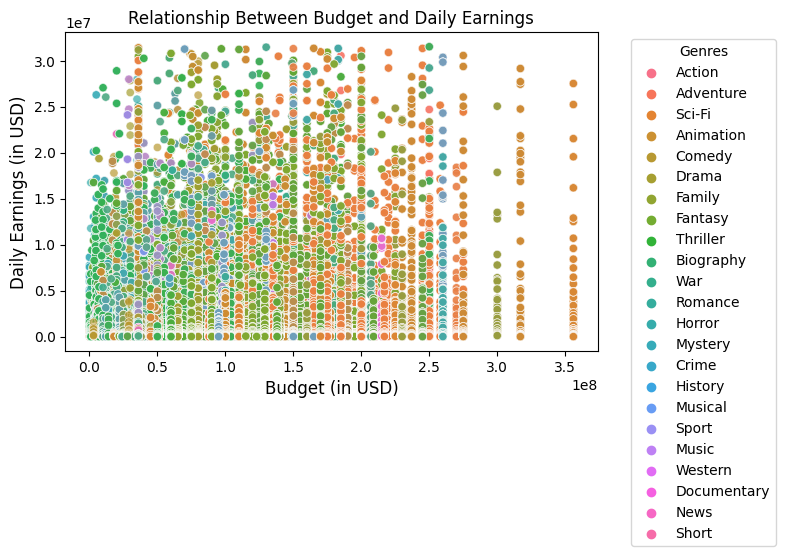

In [66]:
#Visual 1 : Budget vs. Daily Earnings
# Budget vs. Daily Earnings
def plot_budget_vs_daily(data, x_col, y_col, hue_col, title, x_label, y_label):
    """
    Plots a scatterplot to show the relationship between budget and daily earnings.
    
    Parameters:
        data (pd.DataFrame): The dataset to plot.
        hue_col (str): Column name for the hue (categorical variable).
        title (str): Title of the plot.
    """
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=data, x=x_col, y=y_col, hue=hue_col, alpha=0.7)
    plt.title(title, fontsize=12)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.legend(title=hue_col.capitalize(), bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Call function
plot_budget_vs_daily(
    data=combined_df,
    x_col='Budget',
    y_col='Daily',
    hue_col='Genres',
    title='Relationship Between Budget and Daily Earnings',
    x_label='Budget (in USD)',
    y_label='Daily Earnings (in USD)'
)

**Explanation And Answer:**
- Multiple genres (e.g., Action, Adventure, Sci-Fi) dominate high-budget movies, as indicated by their colors in the higher x-axis range.
- Family-friendly genres like Animation seem to perform consistently well at varying budget levels.

**Limitations:**
- Overlapping Data Points: With a large dataset, overlapping points make it harder to differentiate individual observations.
- Genre Influence: Although genres are shown, the effect of genre on the relationship between budget and earnings isn't fully isolated here.

**Potential Questions to Explore:**
- Which genre consistently generates the most revenue for a given budget range?

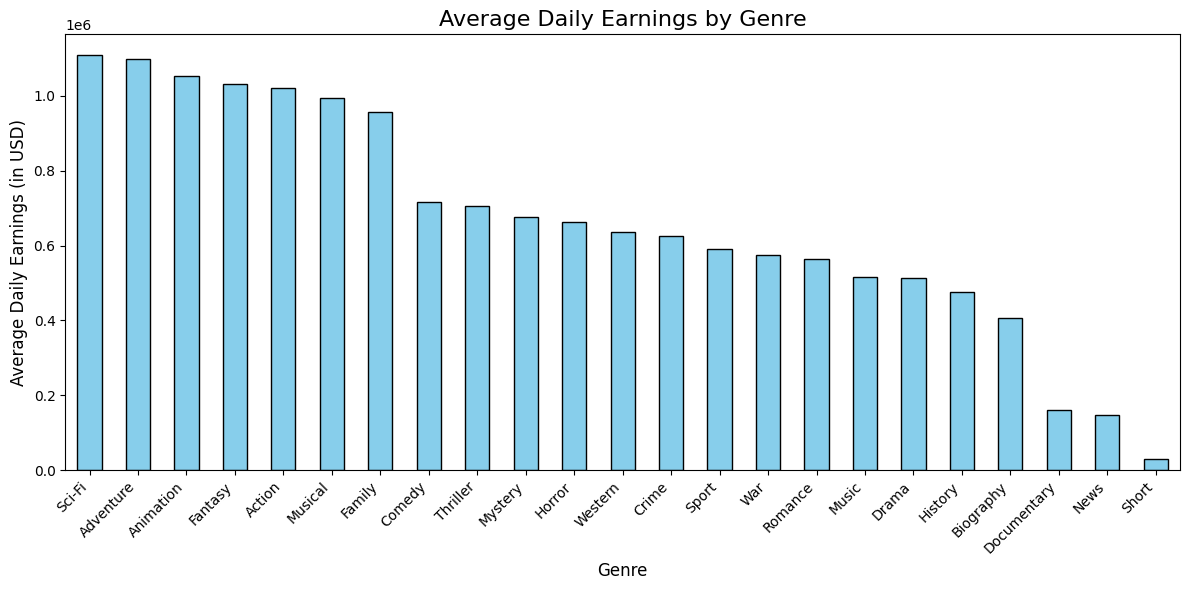

In [59]:
#Visual 2 - Average Daily Earnings by Genre
# Average Daily Earnings by Genre
def plot_avg_daily_by_genre(data, genre_col, daily_col, title, x_label, y_label):
    """
    Plots a bar chart showing the average daily earnings by genre.

    Parameters:
        data (pd.DataFrame): The dataset to analyze.
        genre_col (str): Column name for the genres.
        daily_col (str): Column name for daily earnings.
        title (str): Title of the plot.
    """
    # Calculate average daily earnings by genre
    avg_daily_by_genre = data.groupby(genre_col)[daily_col].mean().sort_values(ascending=False)
    
    # Bar plot
    plt.figure(figsize=(12, 6))
    avg_daily_by_genre.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(title, fontsize=16)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Cell function
plot_avg_daily_by_genre(
    data=combined_df,
    genre_col='Genres',
    daily_col='Daily',
    title='Average Daily Earnings by Genre',
    x_label='Genre',
    y_label='Average Daily Earnings (in USD)'
)

**Explanation And Answer:**
- **Insight:** Genres such as Sci-Fi and Adventure show higher average daily earnings compared to others, while niche genres like News or Short perform lower.
- **Interpretation:** This suggests that specific genres resonate more with audiences and drive higher revenue, likely due to broader appeal and repeat viewings.

### **5.2:** Reflection

**Answer:** If I had more time to complete the project, I would delve deeper into analyzing other factors like Distributor influence and Release Date trends to determine their impact on daily box office performance. Additionally, I would address any remaining missing or inconsistent data, particularly in the Theaters column, by investigating external sources for more accurate values. Finally, I would explore advanced research questions, such as examining the interplay between budget, genre, and runtime to understand their combined effect on a movie's earnings trajectory over time.